# Reading and Understanding the Data
Import NumPy and Pandas and read the MODIS dataset of forest fire

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("modis_2021_India.csv")

In [4]:
df.head()

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,28.0993,96.9983,303.0,1.1,1.1,2021-01-01,409,Terra,MODIS,44,6.03,292.6,8.6,D,0
1,30.0420,79.6492,301.8,1.4,1.2,2021-01-01,547,Terra,MODIS,37,6.03,287.4,9.0,D,0
2,30.0879,78.8579,300.2,1.3,1.1,2021-01-01,547,Terra,MODIS,8,6.03,286.5,5.4,D,0
3,30.0408,80.0501,302.0,1.5,1.2,2021-01-01,547,Terra,MODIS,46,6.03,287.7,10.7,D,0
4,30.6565,78.9668,300.9,1.3,1.1,2021-01-01,547,Terra,MODIS,43,6.03,287.6,9.0,D,0


In [5]:
df.shape

(111267, 15)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111267 entries, 0 to 111266
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    111267 non-null  float64
 1   longitude   111267 non-null  float64
 2   brightness  111267 non-null  float64
 3   scan        111267 non-null  float64
 4   track       111267 non-null  float64
 5   acq_date    111267 non-null  object 
 6   acq_time    111267 non-null  int64  
 7   satellite   111267 non-null  object 
 8   instrument  111267 non-null  object 
 9   confidence  111267 non-null  int64  
 10  version     111267 non-null  float64
 11  bright_t31  111267 non-null  float64
 12  frp         111267 non-null  float64
 13  daynight    111267 non-null  object 
 14  type        111267 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 12.7+ MB


In [7]:
df.columns

Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

In [8]:
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [9]:
df.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,111267.000000,111267.000000,111267.000000,111267.000000,111267.000000,111267.000000,111267.000000,1.112670e+05,111267.000000,111267.000000,111267.000000
mean,24.283092,81.403069,324.826080,1.423418,1.152912,814.960213,64.405170,6.030000e+00,304.247883,29.073369,0.077894
std,4.734092,6.564684,14.780342,0.638741,0.203361,342.842002,18.352227,1.660279e-11,8.439882,87.436113,0.387391
min,8.136200,68.529500,300.000000,1.000000,1.000000,334.000000,0.000000,6.030000e+00,267.200000,0.000000,0.000000
25%,21.291350,76.005350,315.400000,1.000000,1.000000,650.000000,54.000000,6.030000e+00,298.900000,9.100000,0.000000
50%,24.009000,79.450000,323.300000,1.200000,1.100000,751.000000,66.000000,6.030000e+00,303.000000,14.300000,0.000000
75%,29.099800,84.910100,331.600000,1.500000,1.200000,818.000000,76.000000,6.030000e+00,310.300000,25.950000,0.000000
max,34.499500,97.103300,505.700000,4.800000,2.000000,2132.000000,100.000000,6.030000e+00,400.100000,6961.800000,3.000000


# Visualising the Data
 Visualise our data using matplotlib and seaborn

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

##### Visualising Numeric Variables
Let's make a pairplot of all the numeric variables

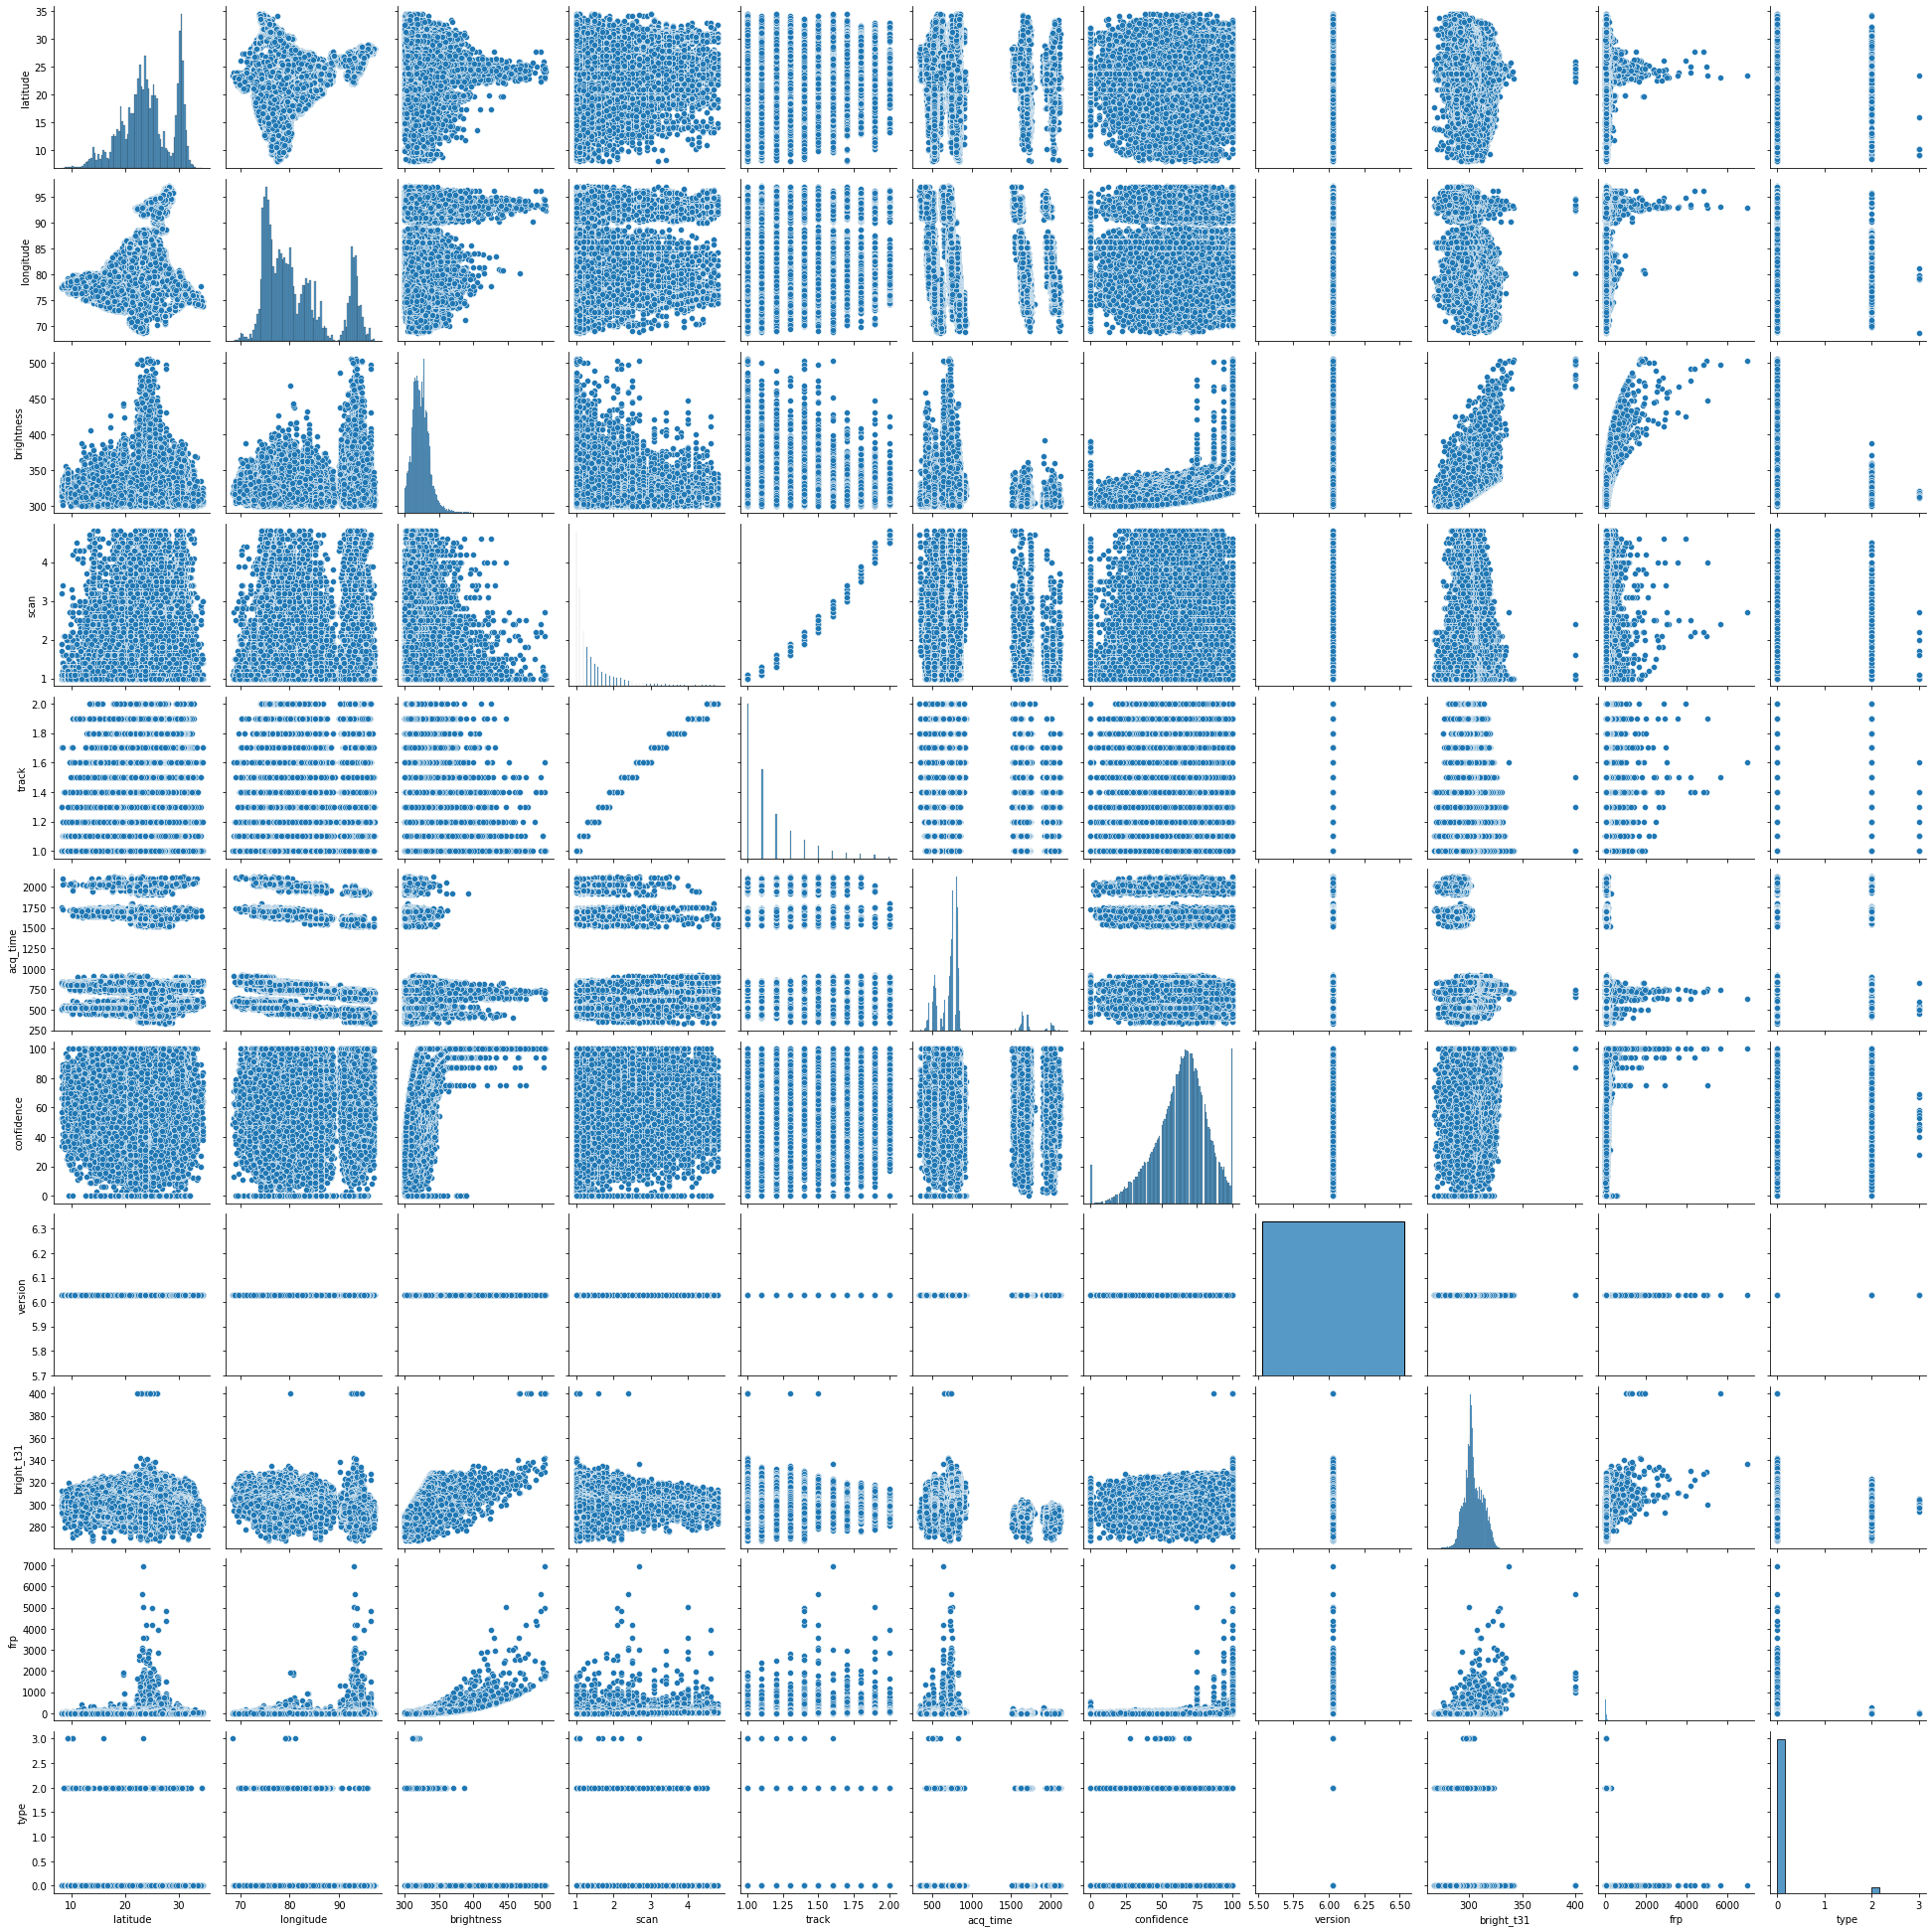

In [11]:
sns.pairplot(df)
plt.show()

##### Visualising Categorical Variables
As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables. 

<AxesSubplot:xlabel='daynight', ylabel='confidence'>

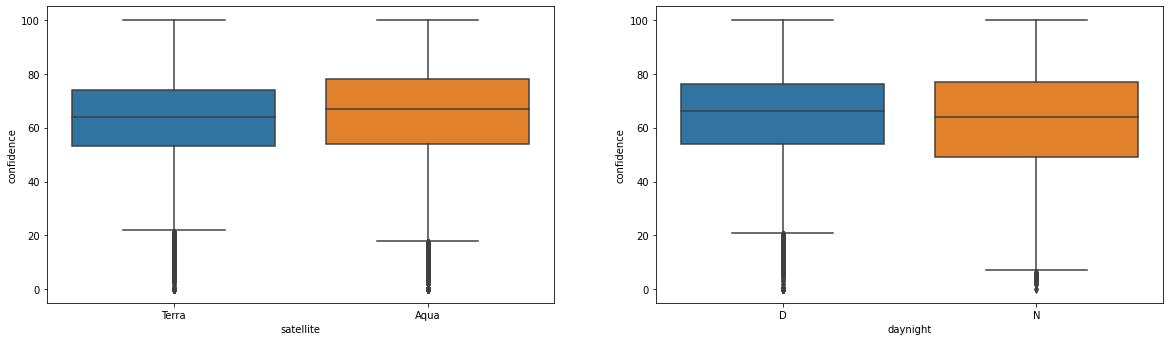

In [12]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.boxplot(x = 'satellite', y = 'confidence', data = df)
plt.subplot(2,2,2)
sns.boxplot(x = 'daynight', y = 'confidence', data = df)

<AxesSubplot:>

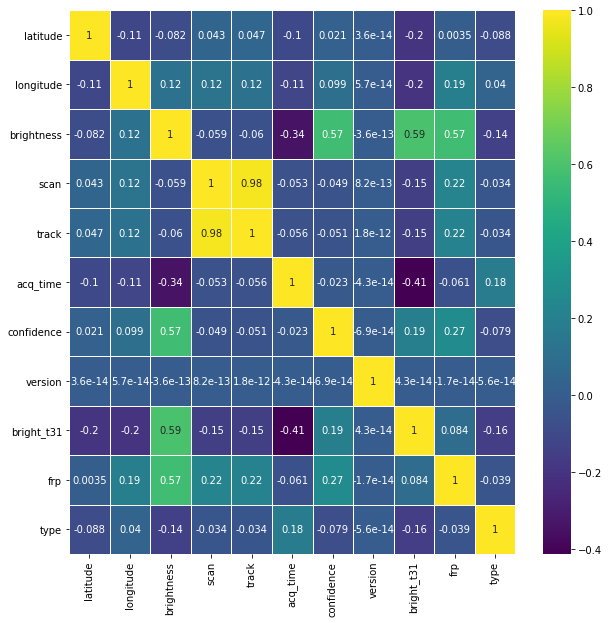

In [13]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(),annot=True,cmap='viridis',linewidths=.5)

<AxesSubplot:xlabel='acq_date', ylabel='frp'>

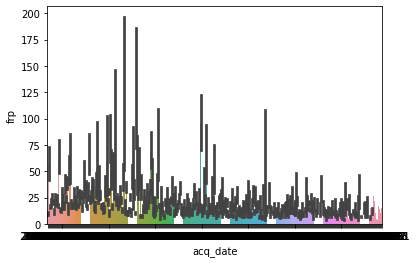

In [32]:
sns.barplot(x='acq_date',y='frp',data=df)

In [34]:
df_topaffected=df.sort_values(by='frp',ascending=False)
df_topaffected.head(10)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,month
21253,23.1406,93.1182,497.3,2.4,2021-03-11,738,1,100,400.1,5658.9,0,0,3
13997,23.9437,93.1403,466.6,2.5,2021-03-05,637,1,94,310.3,3578.0,0,0,3
15323,24.4398,93.3818,430.8,3.4,2021-03-02,745,1,100,306.9,2941.1,0,0,3
16301,23.4341,92.9264,420.2,4.0,2021-03-09,751,1,75,293.1,2904.1,0,0,3
17621,24.3835,94.2663,479.2,1.8,2021-04-14,726,1,100,330.8,2823.8,0,0,4
16428,24.3886,94.2598,474.8,1.8,2021-04-14,726,1,100,334.2,2626.1,0,0,4
6099,23.9381,93.1367,445.9,2.5,2021-03-05,637,1,94,305.6,2466.0,0,0,3
5884,23.9577,93.1403,444.3,2.5,2021-03-05,637,1,100,303.0,2393.7,0,0,3
2092,23.3412,92.5963,403.1,3.8,2021-03-09,751,1,100,303.8,1839.1,0,0,3
298,23.0222,92.5105,504.0,1.0,2021-03-15,714,1,100,400.1,1718.7,0,0,3


In [35]:
#Create a map
import folium
m = folium.Map(location=[24.0,90], control_scale=True, zoom_start=5,attr = "text some",)
df_copy = df_topaffected.copy()

# loop through data to create Marker for each hospital
for i in range(0,200):
     
    folium.Marker(location=[df_copy.iloc[i]['latitude'], df_copy.iloc[i]['longitude']],tooltip="frp: " + str(df_copy.iloc[i]['frp']) + "<br/> date: "+ str(df_copy.iloc[i]['acq_date']),icon=folium.Icon(color='red',icon='fire',prefix="fa"),
    ).add_to(m)
        
m

# Data Preparation

In [14]:
df = df.drop(['track'], axis = 1)

df = df.drop(['instrument', 'version'], axis = 1)

In [15]:
df['satellite'] = df['satellite'].map({'Terra':0,'Aqua':1})
df['daynight'] = df['daynight'].map({'D':0,'N':1})
df['month'] = df['acq_date'].apply(lambda x:int(x.split('-')[1]))
df = df.sample(frac=0.2)
df = df.reset_index().drop("index", axis=1)

In [16]:
df.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type,month
0,18.4789,79.3696,313.3,1.1,2021-12-18,815,1,57,302.1,4.3,0,0,12
1,20.4566,84.8281,306.1,1.2,2021-03-17,1625,0,67,294.8,6.6,1,0,3
2,30.8355,74.6044,316.5,1.0,2021-11-09,812,1,28,301.9,6.1,0,0,11
3,27.2422,82.7534,328.3,2.3,2021-04-22,816,1,72,310.1,27.3,0,0,4
4,29.5644,79.0305,321.0,1.3,2021-04-04,516,0,53,303.4,15.9,0,0,4


In [17]:
df.shape

(22253, 13)

In [18]:
y = df['confidence']
firedf = df.drop(['confidence', 'acq_date'], axis = 1)

<AxesSubplot:>

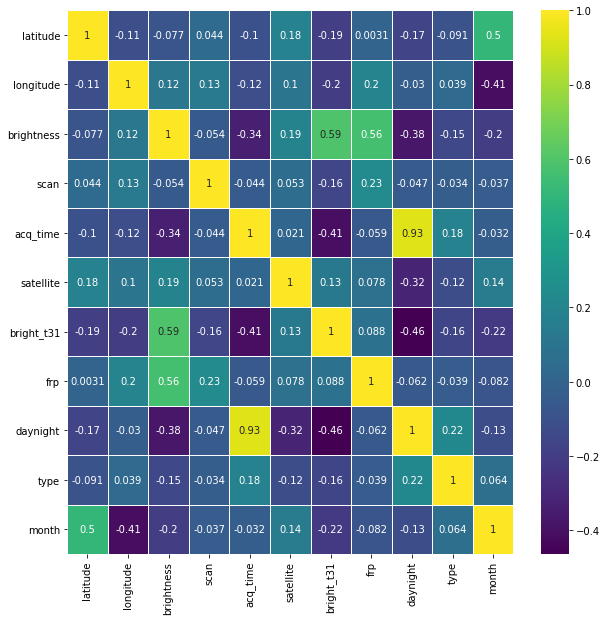

In [19]:
plt.figure(figsize=(10, 10))
sns.heatmap(firedf.corr(),annot=True,cmap='viridis',linewidths=.5)

In [20]:
firedf.head()

,latitude,longitude,brightness,scan,acq_time,satellite,bright_t31,frp,daynight,type,month
0,18.4789,79.3696,313.3,1.1,815,1,302.1,4.3,0,0,12
1,20.4566,84.8281,306.1,1.2,1625,0,294.8,6.6,1,0,3
2,30.8355,74.6044,316.5,1.0,812,1,301.9,6.1,0,0,11
3,27.2422,82.7534,328.3,2.3,816,1,310.1,27.3,0,0,4
4,29.5644,79.0305,321.0,1.3,516,0,303.4,15.9,0,0,4


# Splitting the Data into Training and Testing Sets

In [27]:
X = df[['latitude','longitude','month','brightness','scan','acq_time','bright_t31','daynight']]
y = df['frp']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [28]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
model1 = GradientBoostingRegressor(n_estimators = 100, learning_rate=0.1,
                                  max_depth = 10, random_state = 0, loss = 'ls')
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print ('MSE =',mse(y_pred, y_test))
print ('RSME =',np.sqrt(mse(y_pred, y_test)))
print ('MAE =',mae(y_pred, y_test))
print ('R2_score =',r2_score(y_pred, y_test))

print("Performance ofGBR Model R^2 metric {:.5f}".format(model1.score(X_train,y_train)))
print("GBR Accuracy, {:.5f}%".format(model1.score(X_test,y_test)*100))


MSE = 449.63478569897046
RSME = 21.20459350468597
MAE = 3.2932809652939343
R2_score = 0.9227647882671393
Performance ofGBR Model R^2 metric 0.99982
GBR Accuracy, 92.86853%


In [29]:
from sklearn.tree import DecisionTreeRegressor as dtr
reg = dtr(random_state = 42)
reg.fit(X_train,y_train)
Y_pred = reg.predict(X_test)
print("MSE = ",mse(Y_pred, y_test))
print ('RSME =',np.sqrt(mse(Y_pred, y_test)))
print("MAE =",mae(Y_pred,y_test))
print("R2 score =",r2_score(Y_pred,y_test))
print("Performance of Decision Tree Regressor Model R^2 metric {:.5f}".format(reg.score(X_train,y_train)))
print("Decision Tree Regressor Accuracy, {:.5f}%".format(reg.score(X_test,y_test)*100))

MSE =  362.66616536848414
RSME = 19.043795981066488
MAE = 4.693229478729778
R2 score = 0.9316181035003857
Performance of Decision Tree Regressor Model R^2 metric 1.00000
Decision Tree Regressor Accuracy, 94.24790%


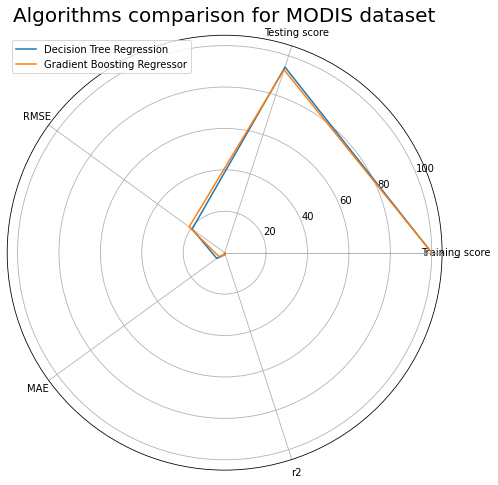

In [31]:

categories = ['Training score', 'Testing score', 'RMSE', 'MAE','r2','_']



Decision_Tree_Regressor = [100,94.24, 19.4,4.69, 0.93,0]


Gradient_Boosting_Regressor = [99.97, 92.86, 21.20,3.29, 0.92,0]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(Decision_Tree_Regressor))

plt.figure(figsize=(8, 8))
plt.subplot(polar=True)

plt.plot(label_loc, Decision_Tree_Regressor , label='Decision Tree Regression')


plt.plot(label_loc, Gradient_Boosting_Regressor, label='Gradient Boosting Regressor')

plt.title('Algorithms comparison for MODIS dataset', size=20)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.show()